# Машины опорных векторов

Машина опорных векторов (Support Vector Machine - SVM) - это классификатор, определенный с использованием гиперплоскости, разделяющей классы. $Разделяющая гиперплоскость$ представляет собой N-мерную версию прямой линии. При условии, что в задаче бинарной классификации задан маркированный обучающий набор данных, SVM находит оптимальную гиперплоскость, которая делит данные на два класса. Этот метод легко распространяется на задачу с N классами

Рассмотрим двумерный случай с двумя классами точек. Таким образом, мы будем иметь дело только с точками и прямыми, расположенными на двумерной плоскости.

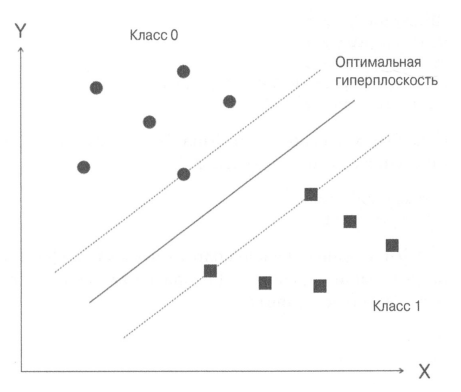

У нас естьдва класса точек и мы хотим найти оптимальную гиперплоскость, которая разделяет эти классы. Но что считать критерием оптимальнотси? На рисунке сплошная линия представляет оптимальную гиперплоскость. Можно провести много линий, которые будут разделять классы точек, но эта линия является наилучшей, так как она максимизирует расстояния, на которые точки удалены от разделяющей их линии. Точки, расположенные на пунктирных линиях, называются $опорными$ $векторами$. Расстояние между двумя пунктирынми линиями называется $максимальным$ $зазором$

# Классификация данных о доходах с помощью машин опорных векторов

Создадим классификатор в виде машины опорных векторов, предназначенный для прогнозирования границ дохода заданного физического лица на основе 14 атрибутов. Нашей целью является выяснение условий, при которых ежегодный доход человека превышает $50000 или меньше этой величины. Следовательно мы имеем дело с задачей бинарной классификации.

Следует отметить особенность набора, это то, то каждая точка данных представляет собой сочетание текста и чисел. Мы не можес использовать данные не в обработанном виде, так как алкгоритмам неизвестно как обрабатывать слова. Мы также не можем преобразовать все данные, используя кодирование меток, так как числовые данные также содержат ценную информацию. Следовательно, чтобы создать жффективынй классификатор, мы должны использовать комбинацию кодировщиков меток и необработанных числовых данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Входной файл, содержащий данные
input_file = 'income_data.txt'

Загружаемые из файла данные нужно подготовить к классификации, подвергнув их редварительной обработке. Для каждого класса мы будем использовать 25000 точек данных

In [3]:
#Чтение данных
X = []
y = []

count_class1 = 0
count_class2 = 0
max_datapoints = 25000

In [4]:
#Откроем файл и прочитаем строки
with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
                break
                
        if '?' in line:
            continue
        
        '''Каждая строка отделяется от следующей с помощью запятой,
        что требует соответствующего разбиения строк. Последним жлементом 
        каждой строки является метка. В зависимости от этой метки мы будем
        относить данные к тому или иному классу'''
        
        data = line[:-1].split(', ')
        
        if data[-1] == '<=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1
        
        if data[-1] == '>50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1

Преобразуем список в массив array, чтобы его можно было использовать в качестве входных данных функций sklearn

In [5]:
#Преобразование в массив numpy
X = np.array(X)

Если атрибут - строка, то он нуждается в кодировании. Если атрибут - число, мы можем оставить его в том виде, как он есть. Заметьте, что в конечном счете мы получим несколько кодировщиков меток, которые нам нужно будет отслеживать.

In [6]:
#Преобразование строковых данных в числовые
label_encoder = []
X_encoded = np.empty(X.shape)

for i, item in enumerate(X[0]):
    if item.isdigit():
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])
        
X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

In [7]:
#Создадим SVM-классификатор с линейным ядром.
classifier = OneVsOneClassifier(LinearSVC(random_state = 0))

#обучение классификатора
classifier.fit(X, y)

OneVsOneClassifier(estimator=LinearSVC(random_state=0))

In [8]:
#Выполним перекрестную проверку, а затем спрогнозируем результат для 
#тренировочных данных
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 5)

classifier = OneVsOneClassifier(LinearSVC(random_state = 0))
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

In [9]:
#Выисление F-меры для SVM-классификатора
f1 = model_selection.cross_val_score(classifier,
                                     X,
                                     y,
                                     scoring = 'f1_weighted',
                                     cv = 3)
print('F1 score: ' + str(round(100 * f1.mean(), 2)) + '%')

F1 score: 56.15%


Теперь, имея подготовленный классификатор, посмотрим, тчо произойдет, если мы выберем некоторую случайную точку данных и предскажем для нее реузльтат. Определим одну такую точку.

In [10]:
#Предсказание результата для тестовой точки данных
input_data = ['37', 'Private', '215646', 'HS-grad', '9', 'Never-married', 
              'Handlers-cleaners', 'Not-in-family', 'White', 'Male', '0', 
              '0', '40', 'United-States']

#Кодирование тестовой точки данных
input_data_encoded = [-1] * len(input_data)
count = 0

for i, item in enumerate(input_data):
    if item.isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
        input_data_encoded[i] = int(label_encoder[count].
                                    transform([input_data[i]]))
        count += 1
        
input_data_encoded = np.array([input_data_encoded])   
print(input_data_encoded)

[[    37      2 215646     11      9      4      5      1      4      1
       0      0     40     38]]


In [11]:
#Выполнение классификатора для кодирования точки данных и вывод
predicted_class = classifier.predict(input_data_encoded)
print(label_encoder[-1].inverse_transform(predicted_class)[0])

<=50K


Проверив значения в этой точке данных, можно убедиться, тчо она близко соответствует точкам данных, принадлежащим классу с доходом менее $50000